MILK MODEL

In [2]:
#importing dependencies
import tarfile
import urllib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
#loading the dataset
training_data = pd.read_csv('testingdata.csv')

In [4]:
training_data.head()

,animal.num,Consumed,Yield,Counsumed.times,Total.Duration,DaysInMilk,Conductivity.LF,Conductivity.LR,Conductivity.RF,Conductivity.RR,lactation,month,age
0,2000,6.32,21.95,2,666,28,5.68,5.63,5.76,5.65,1,7,3.133105
1,2000,6.10,21.52,3,482,29,5.82,5.95,6.11,5.91,1,7,3.135845
2,2000,3.82,13.77,1,270,30,5.96,5.85,5.63,5.67,1,7,3.138584
3,2004,0.98,1.75,1,611,1,5.47,5.90,4.51,4.51,1,7,3.119406
4,2004,5.63,4.71,5,606,2,5.84,6.09,5.96,7.25,1,7,3.122146


In [4]:
training_data.shape


(35444, 13)

In [5]:
#Checking for null values 
training_data[training_data.isnull().any(axis=1)].count()

animal.num         0
Consumed           0
Yield              0
Counsumed.times    0
Total.Duration     0
DaysInMilk         0
Conductivity.LF    0
Conductivity.LR    0
Conductivity.RF    0
Conductivity.RR    0
lactation          0
month              0
age                0
dtype: int64

In [6]:
#removing null values
training_data = training_data.dropna()
training_data.isnull().sum()

animal.num         0
Consumed           0
Yield              0
Counsumed.times    0
Total.Duration     0
DaysInMilk         0
Conductivity.LF    0
Conductivity.LR    0
Conductivity.RF    0
Conductivity.RR    0
lactation          0
month              0
age                0
dtype: int64

In [7]:
np.shape(training_data)

(1610, 13)

In [8]:
# check for missing values
missing_values = training_data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/training_data.shape[0] # normalize
print(f'{missing_values *100} %')

Series([], dtype: float64) %


In [9]:
training_data.dropna(inplace= True)

In [10]:
df = pd.read_csv ('testingdata.csv')
print(df)

      animal.num  Consumed  Yield  Counsumed.times  Total.Duration  \
0           2000      6.32  21.95                2             666   
1           2000      6.10  21.52                3             482   
2           2000      3.82  13.77                1             270   
3           2004      0.98   1.75                1             611   
4           2004      5.63   4.71                5             606   
...          ...       ...    ...              ...             ...   
1605        7046      5.62  20.01                3             461   
1606        7046      5.47  18.38                3             545   
1607        7046      5.62  19.44                2             436   
1608        7046      6.51  22.46                2             386   
1609        7046      2.95   9.77                1             201   

      DaysInMilk  Conductivity.LF  Conductivity.LR  Conductivity.RF  \
0             28             5.68             5.63             5.76   
1             29 

In [11]:
for col in df:
  print(df[col].unique())

[2000 2004 2007 2010 2015 2016 2030 2033 2036 2042 2075 6724 6900 6915
 6945 6954 6969 7046]
[ 6.32  6.1   3.82  0.98  5.63  7.95  0.06  7.58  3.85  0.74  4.92  2.4
  8.94  9.8   3.63  2.97  3.83  5.12  4.96  4.29  4.14 10.    2.87  3.02
  2.81  3.06  2.93  5.79  3.05  2.29  5.8   5.82  6.95  7.32  5.31  5.28
  7.46  2.83 10.22  7.53  3.95  8.29  5.49  5.88  5.46  3.54  1.61  3.18
  7.06  3.17  5.11  5.16  4.84  4.53  4.25  5.96  5.1   5.22  5.09  5.03
  4.83  7.49  4.8   7.25  6.57  7.99 11.32 10.12  5.14  5.47  5.2   4.85
  6.84  6.46  6.38 11.95  5.45  5.42  4.73  8.58  2.92  4.18  3.4   0.02
  3.94  4.54  3.    3.04  5.23  5.4   5.87  4.3   6.05  5.37 10.27  4.79
  8.36  2.95  3.07  0.03  0.21  0.62  3.9   6.22  0.56  5.94  6.14  6.12
  6.03  2.98  3.01  5.9   1.96  2.82  5.61  4.77  2.78  2.46  4.36  5.39
  9.76  4.49  5.33  5.32 10.5  10.04  6.02  2.86  3.89  2.88  7.3   4.76
  6.9   7.03  7.82 10.3  10.09  5.65  5.38  4.61  5.99  6.11  5.18  4.94
  4.91  5.    5.27  2.15  8.4   

In [12]:
#removing null values
df = df.dropna()
df.isnull().sum()

animal.num         0
Consumed           0
Yield              0
Counsumed.times    0
Total.Duration     0
DaysInMilk         0
Conductivity.LF    0
Conductivity.LR    0
Conductivity.RF    0
Conductivity.RR    0
lactation          0
month              0
age                0
dtype: int64

In [13]:
# check for missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/df.shape[0] # normalize
print(f'{missing_values *100} %')

Series([], dtype: float64) %


In [14]:
df.dropna(inplace= True)

In [15]:
for col in df:
  print(df[col].unique())

[2000 2004 2007 2010 2015 2016 2030 2033 2036 2042 2075 6724 6900 6915
 6945 6954 6969 7046]
[ 6.32  6.1   3.82  0.98  5.63  7.95  0.06  7.58  3.85  0.74  4.92  2.4
  8.94  9.8   3.63  2.97  3.83  5.12  4.96  4.29  4.14 10.    2.87  3.02
  2.81  3.06  2.93  5.79  3.05  2.29  5.8   5.82  6.95  7.32  5.31  5.28
  7.46  2.83 10.22  7.53  3.95  8.29  5.49  5.88  5.46  3.54  1.61  3.18
  7.06  3.17  5.11  5.16  4.84  4.53  4.25  5.96  5.1   5.22  5.09  5.03
  4.83  7.49  4.8   7.25  6.57  7.99 11.32 10.12  5.14  5.47  5.2   4.85
  6.84  6.46  6.38 11.95  5.45  5.42  4.73  8.58  2.92  4.18  3.4   0.02
  3.94  4.54  3.    3.04  5.23  5.4   5.87  4.3   6.05  5.37 10.27  4.79
  8.36  2.95  3.07  0.03  0.21  0.62  3.9   6.22  0.56  5.94  6.14  6.12
  6.03  2.98  3.01  5.9   1.96  2.82  5.61  4.77  2.78  2.46  4.36  5.39
  9.76  4.49  5.33  5.32 10.5  10.04  6.02  2.86  3.89  2.88  7.3   4.76
  6.9   7.03  7.82 10.3  10.09  5.65  5.38  4.61  5.99  6.11  5.18  4.94
  4.91  5.    5.27  2.15  8.4   

In [16]:
'''The high EC for healthy =5.48mS/cm,
 subclinical mastitis milk = 6.3mS/cm
 clinical mastitis milk = 8.5mS/cm '''
 

'The high EC for healthy =5.48mS/cm,\n subclinical mastitis milk = 6.3mS/cm\n clinical mastitis milk = 8.5mS/cm '

In [17]:
df.columns

Index(['animal.num', 'Consumed', 'Yield', 'Counsumed.times', 'Total.Duration',
       'DaysInMilk', 'Conductivity.LF', 'Conductivity.LR', 'Conductivity.RF',
       'Conductivity.RR', 'lactation', 'month', 'age'],
      dtype='object')

In [20]:
df = df[df["Conductivity.LF"].str.contains("#NAME?") == False]
df = df[df["Conductivity.LR"].str.contains("#NAME?") == False]
df = df[df["Conductivity.RF"].str.contains("#NAME?") == False]
df = df[df["Conductivity.RR"].str.contains("#NAME?") == False]

AttributeError: Can only use .str accessor with string values!

Dropping the necessary columns for KMEANS clustering

In [18]:
data = df.drop(['animal.num', 'Consumed', 'Yield', 'Counsumed.times', 'Total.Duration',
       'DaysInMilk','lactation', 'month', 'age'], axis=1)
data.head()

,Conductivity.LF,Conductivity.LR,Conductivity.RF,Conductivity.RR
0,5.68,5.63,5.76,5.65
1,5.82,5.95,6.11,5.91
2,5.96,5.85,5.63,5.67
3,5.47,5.90,4.51,4.51
4,5.84,6.09,5.96,7.25


In [20]:
#droping null values
data=data.dropna()


In [21]:
#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
scaled_df = StandardScaler().fit_transform(data)

In [22]:
#view first five rows of scaled DataFrame
print(scaled_df[:5])

[[-0.667501   -0.58080558 -0.49609074 -0.63131553]
 [-0.56203272 -0.38368499 -0.25484395 -0.44150006]
 [-0.45656443 -0.44528517 -0.58569669 -0.61671434]
 [-0.82570342 -0.41448508 -1.35768642 -1.46358332]
 [-0.54696582 -0.29744473 -0.35823543  0.53677963]]


 KMEANS ALGORITHM
 Performing a k-means clustering 

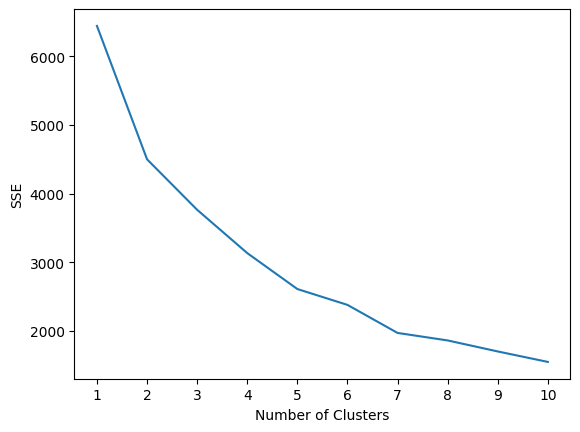

In [23]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Typically when we create this type of plot we look for an “elbow” where the sum of squares begins to “bend” or level off. This is typically the optimal number of clusters. In this plot it appears that there is an elbow or “bend” at k = 3 clusters.

Perform K-Means Clustering with Optimal K

In [24]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#view cluster assignments for each observation
kmeans.labels_



array([1, 1, 1, ..., 1, 1, 1])

 To interpret, we can add a column to the DataFrame that shows the cluster assignment of each Conductivity:

In [25]:
#append cluster assingments to original DataFrame
data['cluster'] = kmeans.labels_

#view updated DataFrame
print(data)

      Conductivity.LF  Conductivity.LR  Conductivity.RF  Conductivity.RR  \
0                5.68             5.63             5.76             5.65   
1                5.82             5.95             6.11             5.91   
2                5.96             5.85             5.63             5.67   
3                5.47             5.90             4.51             4.51   
4                5.84             6.09             5.96             7.25   
...               ...              ...              ...              ...   
1605             6.28             7.64             5.99             6.28   
1606             6.42             6.31             6.00             5.96   
1607             6.13             6.55             5.73             6.23   
1608             6.53             6.55             6.22             6.23   
1609             5.10             5.90             5.53             5.98   

      cluster  
0           1  
1           1  
2           1  
3           1  
4      

'''The high EC for healthy =5.48mS/cm,
 subclinical mastitis milk = 6.3mS/cm
 clinical mastitis milk = 8.5mS/cm '''

VISUALIZING THE DATA

In [26]:
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label_pred= kmeans.fit_predict(data)

Plotting the KMeans Clusters

MODEL ACCURACY

In [27]:
#Evaluating the performance by calculating the silhouette coefficient:
silhouette_score(data,label_pred)

0.3868503444929555

In [31]:
#Calculate Adjusted Rand Index, too, since the ground truth cluster labels are available:
adjusted_rand_score(kmeans.labels_, label_pred)

1.0

In [28]:
#accuracy score

NOTE: The scale for each of these clustering performance metrics ranges from -1 to 1. A silhouette coefficient of 0 indicates that clusters are significantly overlapping one another, and a silhouette coefficient of 1 indicates clusters are well-separated. An ARI score of 0 indicates that cluster labels are randomly assigned, and an ARI score of 1 means that the true labels and predicted labels form identical clusters.

# BUILDING A CLASSIFICATION MODEL


DECISION TREE

In [29]:
#creating a dataframe
new_data = pd.DataFrame(data)
'''#spliting the data into target and features
X = data.drop(columns = 'target' )
y = data.target'''
new_data.head()

,Conductivity.LF,Conductivity.LR,Conductivity.RF,Conductivity.RR,cluster
0,5.68,5.63,5.76,5.65,1
1,5.82,5.95,6.11,5.91,1
2,5.96,5.85,5.63,5.67,1
3,5.47,5.90,4.51,4.51,1
4,5.84,6.09,5.96,7.25,1


In [30]:
# Renaming some of the columns 
new_data = new_data.rename(columns={'cluster':'target'})

In [31]:
#spliting the data into target and features
X = data.iloc[:,:4].values
y = data.iloc[:,4].values
print(X)

[[5.68 5.63 5.76 5.65]
 [5.82 5.95 6.11 5.91]
 [5.96 5.85 5.63 5.67]
 ...
 [6.13 6.55 5.73 6.23]
 [6.53 6.55 6.22 6.23]
 [5.1  5.9  5.53 5.98]]


In [32]:
#spliting the dataset into training and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [33]:
#Performing feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [44]:
# Fitting the model in the Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

MODEL ACCURACY

In [35]:
#prediction
y_pred = classifier.predict(X_test)
print(y_pred)

[2 1 1 1 2 1 2 2 1 2 1 2 2 2 1 1 2 0 2 1 2 1 1 2 2 2 1 2 2 2 1 2 2 1 1 1 1
 2 2 2 1 1 2 2 2 2 1 1 2 2 2 1 1 1 1 1 2 2 2 2 2 1 0 1 2 2 2 2 2 1 2 1 1 1
 2 2 2 2 2 2 1 1 2 1 1 1 1 0 1 1 0 0 1 2 1 1 2 1 2 0 2 1 2 1 2 1 1 1 2 1 1
 2 2 2 2 2 1 1 1 2 1 2 2 1 2 2 2 2 1 2 1 1 2 2 2 0 1 1 2 2 2 2 1 2 1 2 2 2
 2 1 1 1 2 1 1 1 0 1 1 2 1 1 2 1 2 1 2 2 1 2 1 1 2 1 2 2 2 1 1 0 2 2 1 1 2
 2 2 2 0 1 1 1 2 0 2 2 1 2 1 1 2 0 2 2 1 2 2 1 2 1 2 1 1 1 1 1 1 1 1 2 2 0
 1 1 1 2 2 1 0 1 2 2 2 2 2 1 2 2 1 1 2 1 2 2 1 1 1 1 2 2 1 2 1 1 2 2 1 0 1
 2 2 2 1 2 2 1 1 2 1 1 2 1 2 2 1 0 2 1 2 2 1 1 2 2 2 1 1 1 1 1 1 0 2 2 2 2
 2 2 0 2 1 1 1 1 2 2 2 2 1 2 2 1 1 2 1 1 2 2 1 2 2 2 2 0 1 1 1 2 2 2 2 1 1
 0 1 1 1 2 2 2 1 2 1 2 2 2 1 1 2 1 1 1 2 2 2 2 1 2 2 1 2 1 2 2 2 2 1 1 1 2
 1 2 1 0 1 2 2 2 2 1 1 2 1 2 2 2 1 1 2 2 1 2 2 2 2 1 2 2 2 2 2 1 1]


In [36]:

#Accuracy
from sklearn import metrics 
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.9602977667493796


In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

VISUALIZING THE PREDICTED MODEL

Optimizing the Decision Tree Classifier

In [38]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = classifier.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8734491315136477


BUILDING A PREDICTIVE SYSTEM

In [45]:
input_data = (5.43,4.99,5.32,4.53)
#converting the input data into a numpyarray 
input_conductivity = np.asarray(input_data)

#reshaping the numpy array
input_cond_reshaped = input_conductivity.reshape(1,-1)
input_cond_reshaped.shape

#standardizing the data 
input_cond_std = sc_X.transform(input_cond_reshaped)

'''#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
input_conductivity_std= scaled_df.transform(input_cond_reshaped)'''

prediction= classifier.predict(input_cond_std)

print(prediction)

if(prediction[0]==2):
    print("Healthy animal and no mastitis Detected")
  
elif (prediction[0]==1):
    print ("clinical mastitis Detected")

else:
    print("Subclinical mastitis Detected")


[1]
clinical mastitis Detected


SAVING THE MODEL

In [39]:
import pickle
filename = 'milk_model.pkl'
pickle.dump(classifier,open(filename,'wb'))

In [43]:
import pickle
filename = 'milk_model.pkl'

input_data = (5.43,4.99,5.32,4.53)
#converting the input data into a numpyarray 
input_conductivity = np.asarray(input_data)

#reshaping the numpy array
input_cond_reshaped = input_conductivity.reshape(1,-1)
input_cond_reshaped.shape

#standardizing the data 
input_cond_std = sc_X.transform(input_cond_reshaped)
print(input_cond_std)
pickled_model = pickle.load(open(filename, 'rb'))
prediction=pickled_model.predict(input_cond_std)
print(prediction)

if(prediction[0]==2):
    print("Healthy animal and no mastitis Detected")
  
elif (prediction[0]==1):
    print ("clinical mastitis Detected")

else:
    print("Subclinical mastitis Detected")


[1]
clinical mastitis Detected
